In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
data = pd.read_csv('house_data.csv', index_col=0)
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


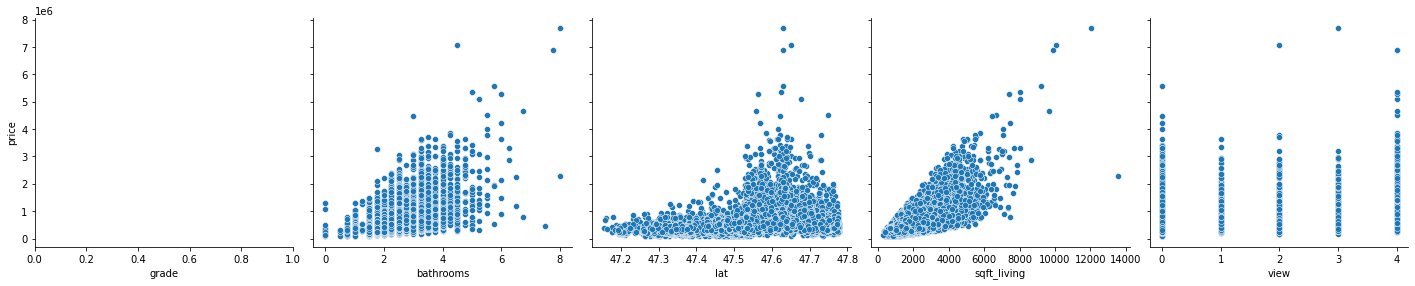

In [26]:
sns.pairplot(data,x_vars=['grade','bathrooms','lat', 'sqft_living', 'view'], y_vars=['price'], height=4, aspect=1)

In [4]:
def feature_scaling(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    output = (x - x_mean) / x_std
    
    return output

In [5]:
# The Predictor and the target variable
X1 = data['grade']
X2 = data['bathrooms']
X3 = data['lat']
X4 = data['sqft_living']
X5 = data['view']
Y = data['price']



# convert X and Y to numpy array
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X4 = np.array(X4)
X5 = np.array(X5)
Y = np.array(Y)

# Make Scaling for the the features
X1_new = feature_scaling(X1)
X2_new = feature_scaling(X2)
X3_new = feature_scaling(X3)
X4_new = feature_scaling(X4)
X5_new = feature_scaling(X5)

features_list = [X1_new, X2_new, X3_new, X4_new, X5_new]

# Cost Function Equation
<div>
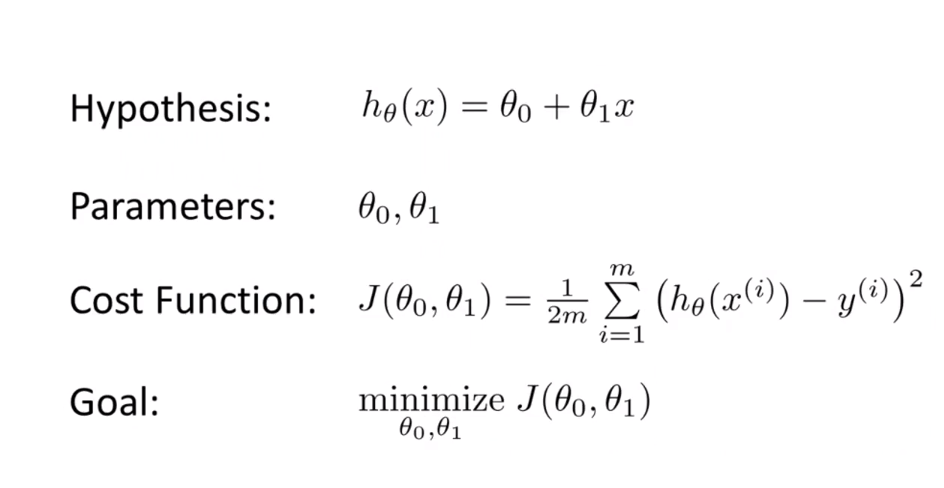
</div>

In [6]:
def hypothesis(*args):
    nums = args[0]
    hypo = nums[0]
    for i in range(1, len(nums)):
        hypo += nums[i] * features_list[i-1]
    return hypo

In [7]:
theta_list = [-1,-5,5,4,3,2]
hypothesis(theta_list)

array([-10.40445008,   8.30786925,  -0.9455169 , ..., -10.14831842,
        -2.87523308, -10.15697889])

In [8]:
# calculate the cost function for the predcitor
def cost_func(hypo, y, m, X):
    sum_mean = 0.0
    for i in range(m):
        if len(X) == 1:
            sum_mean += (hypo[i] - y[i])
        else:
            sum_mean += (hypo[i] - y[i]) * X[i]
    sum_mean =  sum_mean / (m)
    return sum_mean

In [9]:
def square_error(hypo, y, m):
    sum_mean = 0.0
    for i in range(m):
        sum_mean += (hypo[i] - y[i]) ** 2
    sum_mean = float("{:.2f}".format(sum_mean / (2 * m)))
    return sum_mean

In [10]:
def gradient_decent(iterations, learning_rate, theta_list):
    tmps = []
    errors = []
    for i in range(iterations):
        hypo = hypothesis(theta_list)
        tmps.append(theta_list[0] - learning_rate * cost_func(hypo, Y, Y.size, [1]))
        for i in range(1, len(theta_list)):
            tmps.append(theta_list[i] - learning_rate * cost_func(hypo , Y, Y.size, features_list[i - 1]))
        theta_list.clear()
        for i in tmps:
            theta_list.append(i)
        tmps.clear()
        errors.append(square_error(hypo, Y, Y.size))
        #print("Error" , error)
        #print(f"The new theta list {theta_list}")
    return errors

In [11]:
# learning rate of 0.01
iterations = 2000
learning_rate = 0.01
theta_list = [0,0,0,0,0,0]
errors = gradient_decent(iterations, learning_rate, theta_list)

Text(0, 0.5, 'Cost Function')

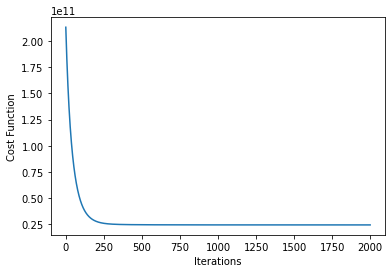

In [16]:
plt.plot(np.arange(iterations), errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

In [17]:
x1 = feature_scaling(X1)
x2 = feature_scaling(X2)
x3 = feature_scaling(X3)
x4 = feature_scaling(X4)
x5 = feature_scaling(X5)

features = [x1, x2, x3, x4, x5]
predicted = theta_list[0]

for i in range(1, len(theta_list)):
    predicted += theta_list[i] * features[i - 1]

data['predicted'] = predicted
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,287081.359095
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,657342.930420
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,280750.280457
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,396663.440001
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,512227.771843
